In [3]:
%pip install pandas
import pandas as pd

  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.0-cp313-cp313-win_amd64.whl (12.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------- 2/4 [numpy]
   -------------------- ------------------

In [5]:
dataset = pd.read_csv("housing.csv")
dataset.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
%pip install matplotlib
import numpy as np
np.random.seed(42)

%matplotlib inline



Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.pyplot as plt

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [10]:
dataset.shape

(20640, 10)

A linha `dataset.shape` retorna uma tupla com o número de linhas e colunas do DataFrame `dataset`. Por exemplo, `(1460, 10)` indica 1460 linhas e 10 colunas. Isso é útil para entender o tamanho do conjunto de dados carregado do arquivo `housing.csv`.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


O comando `dataset.info()` exibe um resumo do DataFrame carregado, mostrando o número de entradas, nomes das colunas, quantidade de valores não nulos em cada coluna e o tipo de dado de cada coluna. Isso ajuda a entender rapidamente a estrutura e a qualidade dos dados presentes em `dataset`.

Opa! Observe aqui que **total_bedrooms** possui **20433** linhas de informações preenchidas (não nulos). Isso significa que **207** bairros não possuem características.🤔

A única variável do tipo texto é "ocean_proximity". Vamos analisar quantas categorias existem e quantos bairros pertencem a essas categorias utilizando a função value_counts()?


In [14]:
set(dataset["ocean_proximity"])
dataset["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

O trecho `set(dataset["ocean_proximity"])` é utilizado para obter todas as categorias únicas presentes na coluna `ocean_proximity` do DataFrame. O uso da função `set()` retorna um conjunto com os valores distintos, permitindo identificar rapidamente quais são as diferentes categorias de proximidade ao oceano registradas no conjunto de dados.

Já a linha `dataset["ocean_proximity"].value_counts()` conta quantas vezes cada categoria aparece na coluna `ocean_proximity`. O método `value_counts()` retorna uma série ordenada, onde o índice representa cada categoria e o valor associado indica a quantidade de ocorrências daquela categoria. Isso é útil para analisar a distribuição dos bairros em relação à proximidade do oceano, facilitando a visualização de quais categorias são mais frequentes no dataset.

In [16]:
dataset.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

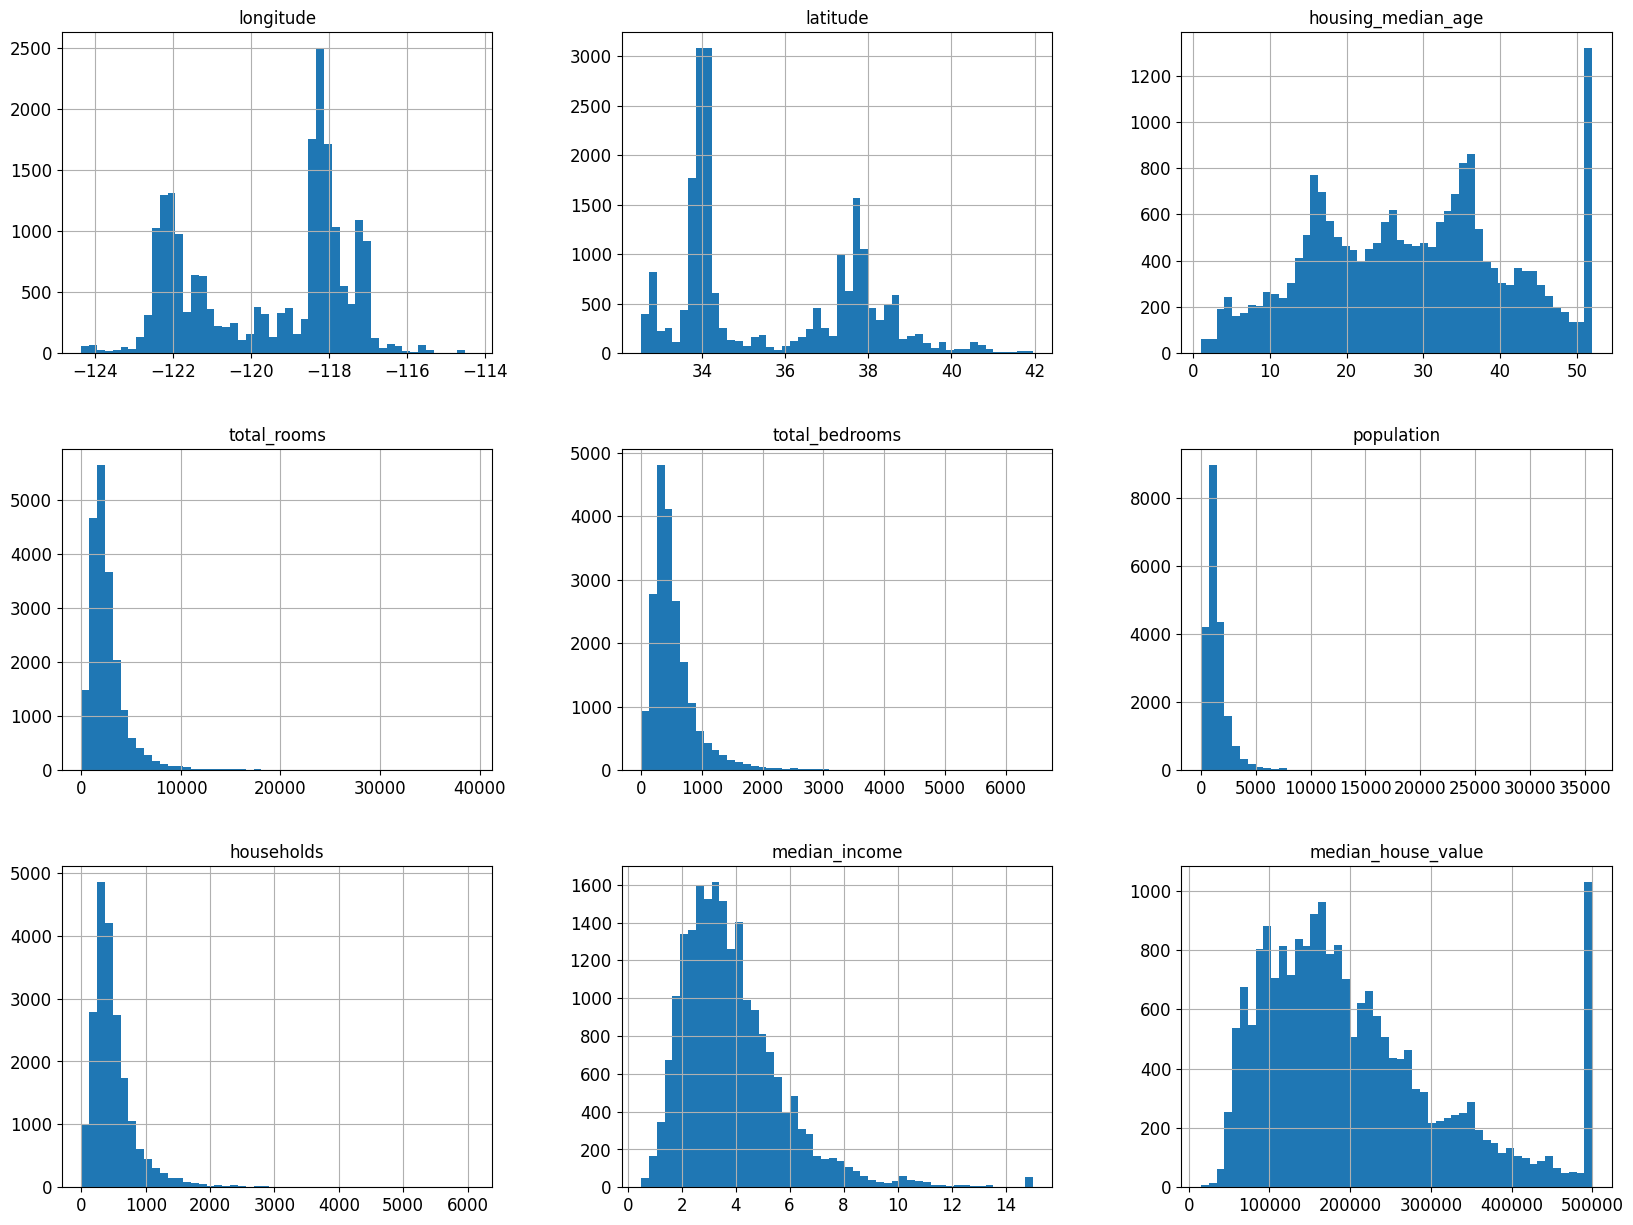

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

O comando %matplotlib inline é uma mágica do Jupyter Notebook que garante que os gráficos gerados pelo Matplotlib sejam exibidos diretamente nas células do notebook, facilitando a visualização dos resultados sem a necessidade de comandos adicionais.

A linha import matplotlib.pyplot as plt importa o módulo pyplot da biblioteca Matplotlib, que fornece funções para criar e personalizar gráficos de forma simples e intuitiva.

Por fim, dataset.hist(bins=50, figsize=(20,15)) gera histogramas para todas as colunas numéricas do DataFrame dataset. O parâmetro bins=50 define que cada histograma terá 50 intervalos (ou "caixas"), permitindo uma visualização detalhada da distribuição dos dados. Já figsize=(20,15) ajusta o tamanho da figura para que todos os gráficos fiquem legíveis e bem distribuídos na tela. Essa abordagem é útil para obter rapidamente uma visão geral das distribuições das variáveis numéricas do conjunto de dados.